<a href="https://colab.research.google.com/github/naoya1110/ai_robotics_lab_2022_hands_on/blob/main/Week03_supplemental_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supplemental material for Week03, explaining how the model parameters are optimized with stochastic gradient decent (SGD) method.

In this example, we are going to implement a simple linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here we create a dataset of $x$ (inputs) and $y$ (outputs) with a simple linear equation below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

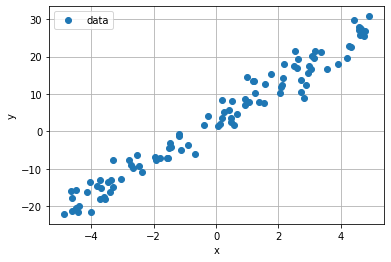

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=4.951, b=2.994


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

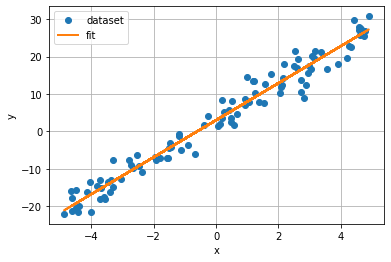

In [4]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [5]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` that predicts an output value of $y$ from an input value of $x$ with the parameters of $w$ and $b$.

In [6]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to calculate the mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This kind of function is called loss function which can be used for measuring how wrong the model prediction was.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [7]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what $w$ and $b$ are. So we initialize those values with arbitary numbers.

In [8]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now we can make a prediction using `model()`

In [9]:
p = model(x)
print(p)

tensor([-4.3234, -6.5259, -4.5912, -9.5052, -1.8460, -4.5306, -2.0316, -4.9360,
        -9.4221, -2.3989, -6.4986, -5.3994, -2.8868, -1.8166, -2.9583, -8.7348,
        -9.0313, -1.6211, -8.7176, -0.4336, -4.0162, -0.3704, -2.8496, -7.7400,
        -3.2307, -6.4336, -1.4469, -5.2478, -9.8623, -2.2788, -8.0376, -2.2682,
        -8.5742, -1.9629, -0.6721, -8.8030, -9.6409, -6.4697, -0.2164, -5.8849,
        -4.7557, -4.8007, -6.1943, -0.8135, -7.8001, -1.0869, -4.8175, -3.7482,
        -7.3853, -8.4548, -6.9172, -8.2938, -7.6543, -3.4459, -4.0863, -4.5113,
        -4.4156, -7.5232, -6.1227, -1.9194, -2.9277, -2.1672, -0.7325, -0.3421,
        -0.2531, -9.5070, -4.4921, -2.0425, -6.7934, -9.6167, -3.4507, -6.5655,
        -5.6795, -4.8800, -6.1741, -3.8183, -3.6147, -9.3819, -0.4059, -8.3047,
        -6.9599, -4.0692, -8.6091, -2.4978, -8.4013, -9.1244, -9.0232, -8.6743,
        -2.4538, -8.3599, -0.3722, -2.8132, -9.6188, -2.3851, -0.5653, -3.7871,
        -2.1168, -0.1040, -7.4715, -3.94

Let's visualize current prediction. As we set arbitary number for $w$ and $b$, the model prediction does not fit the data well for sure.

Text(0, 0.5, 'y')

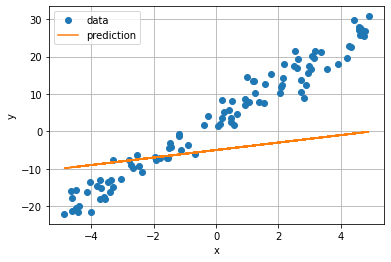

In [10]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [11]:
loss = loss_func(p, y)
print(loss)

tensor(214.1167, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss respect to current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients of $ \frac{\partial \mathrm{loss}}{\partial w}$ and $\frac{\partial \mathrm{loss}}{\partial b}$ can be accessed by `w.grad` and `b.grad`, respectively.

In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-70.7149)
tensor(-16.6617)


Then we can update $w$ and $b$ by using equations below where $\eta$ is learning rate. This is a method called stochastic gradient descent (SGD).

$\displaystyle w := w - \eta\frac{\partial}{\partial w}\mathrm{loss}$

$\displaystyle b := b - \eta\frac{\partial}{\partial b}\mathrm{loss}$


When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated at the beginning.

In [13]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values ($w$=5.0, $b$=3.0) than the initial values.

In [14]:
print(w)
print(b)

tensor(1.7071, requires_grad=True)
tensor(-4.8334, requires_grad=True)


In order to optimize $w$ and $b$ further, we repeat above process many times.

In [15]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate 
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w 
        b -= b.grad*lr        # update b
        
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=58.509, w=3.349, b=-0.917
Epoch 2, loss=46.698, w=3.637, b=-0.836
Epoch 3, loss=38.495, w=3.874, b=-0.757
Epoch 4, loss=32.751, w=4.070, b=-0.680
Epoch 5, loss=28.685, w=4.231, b=-0.605
Epoch 6, loss=25.766, w=4.363, b=-0.532
Epoch 7, loss=23.633, w=4.473, b=-0.460
Epoch 8, loss=22.040, w=4.562, b=-0.391
Epoch 9, loss=20.820, w=4.637, b=-0.322
Epoch 10, loss=19.858, w=4.697, b=-0.255
Epoch 11, loss=19.078, w=4.748, b=-0.190
Epoch 12, loss=18.426, w=4.789, b=-0.126
Epoch 13, loss=17.866, w=4.823, b=-0.063
Epoch 14, loss=17.373, w=4.850, b=-0.002
Epoch 15, loss=16.930, w=4.873, b=0.058
Epoch 16, loss=16.525, w=4.892, b=0.117
Epoch 17, loss=16.151, w=4.907, b=0.175
Epoch 18, loss=15.801, w=4.920, b=0.231
Epoch 19, loss=15.471, w=4.930, b=0.286
Epoch 20, loss=15.158, w=4.938, b=0.341
Epoch 21, loss=14.862, w=4.945, b=0.394
Epoch 22, loss=14.579, w=4.951, b=0.446
Epoch 23, loss=14.308, w=4.955, b=0.497
Epoch 24, loss=14.049, w=4.959, b=0.547
Epoch 25, loss=13.801, w=4.962, b=0

Now you see $w$ is close to 5.0 and $b$ is close to 3.0.

Let's visualize how the loss value decreased.

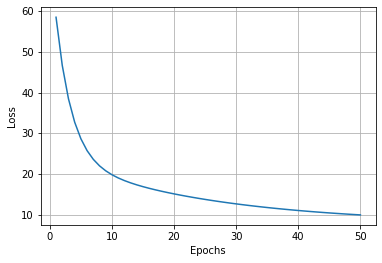

In [16]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

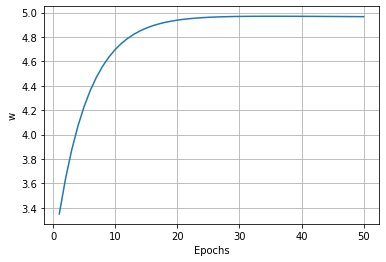

In [17]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

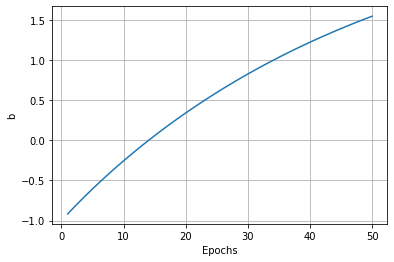

In [18]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Text(0, 0.5, 'y')

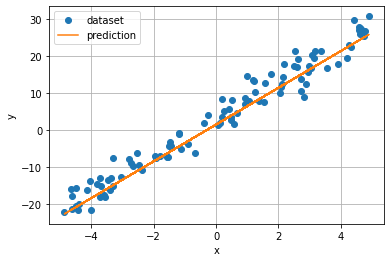

In [19]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.